In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('Data Sample1.xlsx')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 14 columns):
InvoiceNo          54214 non-null object
StockCode          54214 non-null object
Description        54080 non-null object
Quantity           54214 non-null int64
InvoiceDate        54214 non-null datetime64[ns]
UnitPrice          54214 non-null float64
CustomerID         40643 non-null float64
Country            54214 non-null object
TotalSum           54214 non-null float64
InvoiceC           54214 non-null int64
CountryUK          54214 non-null int64
Quantity>0         54214 non-null int64
Sum+               54214 non-null int64
CustomerNotNull    54214 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 5.8+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,InvoiceC,CountryUK,Quantity>0,Sum+,CustomerNotNull
0,C581465,22171,3 HOOK PHOTO SHELF ANTIQUE WHITE,-1,2011-12-08 18:59:00,8.50,15755.0,United Kingdom,-8.50,1,1,0,0,1
1,C581330,22959,WRAP CHRISTMAS VILLAGE,-25,2011-12-08 11:57:00,0.42,15877.0,United Kingdom,-10.50,1,1,0,0,1
2,C581322,22666,RECIPE BOX PANTRY YELLOW DESIGN,-1,2011-12-08 11:51:00,2.95,18223.0,United Kingdom,-2.95,1,1,0,0,1
3,C581229,79191C,RETRO PLASTIC ELEPHANT TRAY,-24,2011-12-08 10:14:00,0.85,12558.0,USA,-20.40,1,0,0,0,1
4,C581229,21507,ELEPHANT BIRTHDAY CARD,-12,2011-12-08 10:14:00,0.42,12558.0,USA,-5.04,1,0,0,0,1


In [4]:
# Интересует сумма TotalSum или сумма возвратов
df[df['TotalSum']<0].sum()

InvoiceNo          C581465C581330C581322C581229C581229C581228C581...
Description        3 HOOK PHOTO SHELF ANTIQUE WHITEWRAP CHRISTMAS...
Quantity                                                      -13705
UnitPrice                                                    30143.1
CustomerID                                               1.37835e+07
Country            United KingdomUnited KingdomUnited KingdomUSAU...
TotalSum                                                    -56072.1
InvoiceC                                                         960
CountryUK                                                        828
Quantity>0                                                         0
Sum+                                                               0
CustomerNotNull                                                  921
dtype: object

In [5]:
# Узнаем общее количество уникальных заказов
df['InvoiceNo'].nunique()

14877

In [6]:
# Узнаем количество уникальных пользователей
df['CustomerID'].nunique()

3819

In [29]:
# Подсчитаем количество возращенных товаров
df_invoice = df[df['InvoiceC'].isin([1])]
df_invoice['StockCode'].value_counts()

M         26
22423     22
POST      14
D         13
22666     10
22960      8
21314      8
20725      8
22456      7
21231      6
S          6
23245      6
22197      6
22727      5
84949      5
84946      5
21232      4
85123A     4
85066      4
22720      4
21844      4
23165      4
22191      4
22467      4
23146      4
21931      4
23243      4
21735      4
21527      4
20727      4
          ..
22114      1
23111      1
37449      1
37450      1
22093      1
22094      1
23119      1
22096      1
22098      1
20719      1
22103      1
23130      1
22107      1
84970S     1
21284      1
23177      1
23147      1
22183      1
22130      1
21531      1
82551      1
23160      1
22139      1
22142      1
21123      1
22149      1
23174      1
22151      1
48185      1
84992      1
Name: StockCode, Length: 611, dtype: int64

In [13]:
# Уберем пустых пользователей
df_customers = df[df['CustomerNotNull'].isin([1])]
df_customers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,InvoiceC,CountryUK,Quantity>0,Sum+,CustomerNotNull
0,C581465,22171,3 HOOK PHOTO SHELF ANTIQUE WHITE,-1,2011-12-08 18:59:00,8.50,15755.0,United Kingdom,-8.50,1,1,0,0,1
1,C581330,22959,WRAP CHRISTMAS VILLAGE,-25,2011-12-08 11:57:00,0.42,15877.0,United Kingdom,-10.50,1,1,0,0,1
2,C581322,22666,RECIPE BOX PANTRY YELLOW DESIGN,-1,2011-12-08 11:51:00,2.95,18223.0,United Kingdom,-2.95,1,1,0,0,1
3,C581229,79191C,RETRO PLASTIC ELEPHANT TRAY,-24,2011-12-08 10:14:00,0.85,12558.0,USA,-20.40,1,0,0,0,1
4,C581229,21507,ELEPHANT BIRTHDAY CARD,-12,2011-12-08 10:14:00,0.42,12558.0,USA,-5.04,1,0,0,0,1


In [14]:
# Узнаем количество уникальных пользователей
df_customers['CustomerID'].nunique()

3819

In [15]:
# Узнаем количество возвратов
df_invoice = df[df['InvoiceC'].isin([1])]
df_invoice['InvoiceNo'].nunique()

746

In [13]:
# Узнаем реальное количество заказов (без возвратов)
df['InvoiceNo'].nunique()-df_invoice['InvoiceNo'].nunique()

14131

In [41]:
apc = (df['InvoiceNo'].nunique()-df_invoice['InvoiceNo'].nunique())/df_customers['CustomerID'].nunique()
print ('Среднее число продаж на клиента =', apc)

Среднее число продаж на клиента = 3.7001832940560355


In [42]:
av_price = df_customers['UnitPrice'].mean()
print ('Средняя цена товара =', av_price)

Средняя цена товара = 3.474702187338308


In [43]:
ARPPU = av_price*apc
print ('Средний чек на платящего пользователя =', ARPPU)

Средний чек на платящего пользователя = 12.857034985409173


Проведем кластеризацию клиентов

In [44]:
X1 = df_customers.iloc[:, [3,8]].values

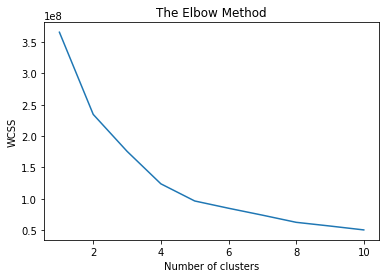

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init = 10,random_state = 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter=300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X1)

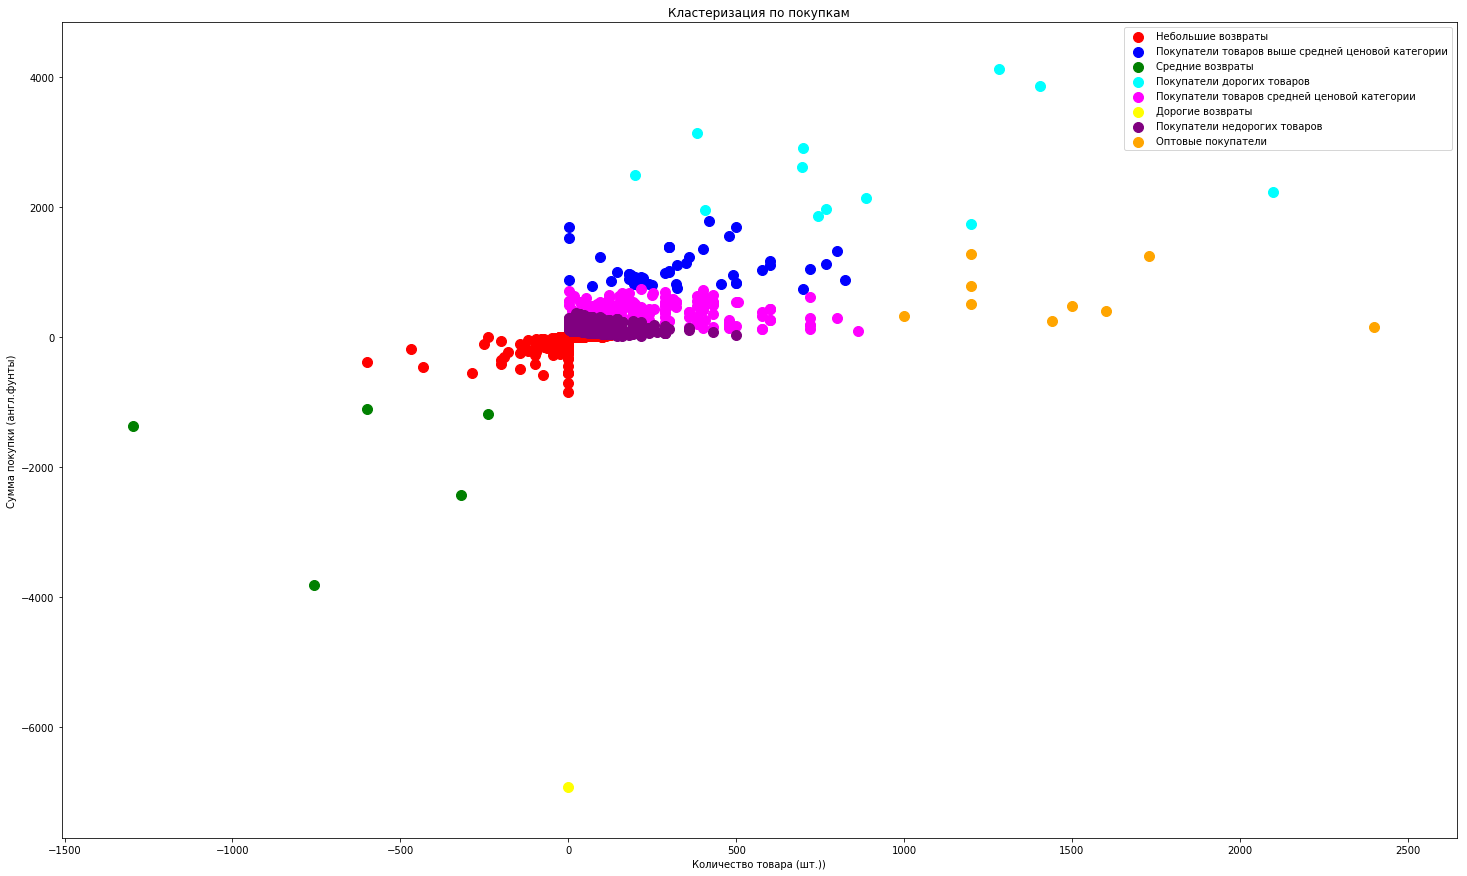

In [30]:
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Небольшие возвраты')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Покупатели товаров выше средней ценовой категории')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Средние возвраты')
plt.scatter(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Покупатели дорогих товаров')
plt.scatter(X1[y_kmeans == 4, 0], X1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Покупатели товаров средней ценовой категории')
plt.scatter(X1[y_kmeans == 5, 0], X1[y_kmeans == 5, 1], s = 100, c = 'yellow', label = 'Дорогие возвраты')
plt.scatter(X1[y_kmeans == 6, 0], X1[y_kmeans == 6, 1], s = 100, c = 'purple', label = 'Покупатели недорогих товаров')
plt.scatter(X1[y_kmeans == 7, 0], X1[y_kmeans == 7, 1], s = 100, c = 'orange', label = 'Оптовые покупатели')
plt.title('Кластеризация по покупкам')
plt.xlabel('Количество товара (шт.))')
plt.ylabel('Сумма покупки (англ.фунты)')
plt.legend()
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.show()

Проведем анализ по ID клиента

In [38]:
df_customers[df_customers['CustomerID']==14911].groupby('Quantity').max()

,InvoiceNo,Description,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,InvoiceC,CountryUK,Quantity>0,Sum+,CustomerNotNull
Quantity,,,,,,,,,,,,
-24,C539576,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-20 12:25:00,2.95,14911.0,EIRE,-30.00,1,0,0,0,1
-20,C539576,TEA TIME OVEN GLOVE,2010-12-20 12:25:00,1.25,14911.0,EIRE,-25.00,1,0,0,0,1
-12,C562375,IVORY REFECTORY CLOCK,2011-08-04 14:46:00,8.15,14911.0,EIRE,-59.40,1,0,0,0,1
-11,C577828,BOX OF 6 MINI VINTAGE CRACKERS,2011-11-22 09:53:00,2.08,14911.0,EIRE,-22.88,1,0,0,0,1
-7,C569114,EMERGENCY FIRST AID TIN,2011-09-30 12:50:00,1.25,14911.0,EIRE,-8.75,1,0,0,0,1
-6,C570828,DIAMANTE HAIR GRIP PACK/2 MONTANA,2011-10-12 13:15:00,2.95,14911.0,EIRE,-9.90,1,0,0,0,1
-4,C570828,CRYSTAL PAIR HEART HAIR SLIDES,2011-10-12 13:15:00,3.75,14911.0,EIRE,-15.00,1,0,0,0,1
-3,C543442,PINK NEW BAROQUECANDLESTICK CANDLE,2011-02-08 11:40:00,2.95,14911.0,EIRE,-8.85,1,0,0,0,1
-2,C575160,SILVER ROCCOCO CHANDELIER,2011-11-08 16:23:00,29.95,14911.0,EIRE,-3.30,1,0,0,0,1


In [39]:
df_customers[df_customers['CustomerID']==12748].groupby('Quantity').max()

,InvoiceNo,Description,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,InvoiceC,CountryUK,Quantity>0,Sum+,CustomerNotNull
Quantity,,,,,,,,,,,,
-4,C546997,VICTORIAN METAL POSTCARD SPRING,2011-03-18 13:32:00,1.69,12748.0,United Kingdom,-6.76,1,1,0,0,1
1,581580,YULETIDE IMAGES S/6 PAPER BOXES,2011-12-09 12:20:00,25.00,12748.0,United Kingdom,25.00,0,1,1,1,1
2,581580,WHITE BROCANTE SOAP DISH,2011-12-09 12:20:00,12.75,12748.0,United Kingdom,25.50,0,1,1,1,1
3,580611,VINTAGE PAISLEY STATIONERY SET,2011-12-05 11:49:00,4.25,12748.0,United Kingdom,12.75,0,1,1,1,1
4,580468,VINTAGE UNION JACK MEMOBOARD,2011-12-04 12:31:00,9.95,12748.0,United Kingdom,39.80,0,1,1,1,1
5,580611,WHITE LOVEBIRD LANTERN,2011-12-05 11:49:00,4.25,12748.0,United Kingdom,21.25,0,1,1,1,1
6,579188,VINTAGE RED MUG,2011-11-28 15:34:00,1.69,12748.0,United Kingdom,10.14,0,1,1,1,1
8,575117,SET OF 4 PANTRY JELLY MOULDS,2011-11-08 14:22:00,1.25,12748.0,United Kingdom,10.00,0,1,1,1,1
10,578278,WOOD STAMP SET FLOWERS,2011-11-23 13:51:00,2.08,12748.0,United Kingdom,20.80,0,1,1,1,1


In [40]:
df_customers[df_customers['CustomerID']==17841].groupby('Quantity').max()

,InvoiceNo,Description,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,InvoiceC,CountryUK,Quantity>0,Sum+,CustomerNotNull
Quantity,,,,,,,,,,,,
-2,C545866,WOODLAND STORAGE BOX SMALL,2011-03-07 14:27:00,2.10,17841.0,United Kingdom,-4.20,1,1,0,0,1
-1,C566671,WOODEN PICTURE FRAME WHITE FINISH,2011-09-14 11:39:00,7.65,17841.0,United Kingdom,-0.29,1,1,0,0,1
1,581334,ZINC SWEETHEART WIRE LETTER RACK,2011-12-08 12:07:00,39.95,17841.0,United Kingdom,39.95,0,1,1,1,1
2,581334,ZINC T-LIGHT HOLDER STARS SMALL,2011-12-08 12:07:00,9.95,17841.0,United Kingdom,19.90,0,1,1,1,1
3,580956,ZINC METAL HEART DECORATION,2011-12-06 14:23:00,6.25,17841.0,United Kingdom,18.75,0,1,1,1,1
4,580956,ZINC T-LIGHT HOLDER STARS SMALL,2011-12-06 14:23:00,6.75,17841.0,United Kingdom,27.00,0,1,1,1,1
5,580956,WOODLAND CHARLOTTE BAG,2011-12-06 14:23:00,2.95,17841.0,United Kingdom,14.75,0,1,1,1,1
6,581334,WOODEN PICTURE FRAME WHITE FINISH,2011-12-08 12:07:00,5.75,17841.0,United Kingdom,34.50,0,1,1,1,1
7,577549,STRAWBERRY LUNCH BOX WITH CUTLERY,2011-11-20 15:00:00,2.55,17841.0,United Kingdom,17.85,0,1,1,1,1
